# The Machine Learning Group Challenge!

##  Today's Mission
- Your objective is to devise the best possible model to predict successful/default loans using a preprocessed version of the Lending Club loan dataset.

- Class into divided into 2 groups. Groups were decided by an extremely high tech clustering algorithm.

        Team Seaborn: Shobha, Darren, Cedric
        Team Pandas: Ana, Corey, Shivendra, Eric
        

- The training data is 13689 loans labeled either as 1 (successful) or 0 (default). Comes with 30 categorical and numerical features. The testing data is also 13689 loans.

- A data dictionary file is included as well. It is a table explaining each what each feature means.

- Groups will judged on how much money their model makes. You will evaluate your model on the testing dataset. You cannot used testing data to train a model.

- Your profit will be determined by the amount of money you make from correctly predicting good loans (loan amount * interest rate/100.) subtracted by the money you lose from incorrectly predicting bad loans as good (-loan amount). I have given a function to calculate that.

- Finding the correct probability threshold will be super key in determing how much money you make.

- **VERY IMPORTANT:** You must transform your testing the data the same way you did your training data. So make sure you have the same columns in the same order.
        
- I will be on be hand for guidance. However I want you to primarily use your teammates for help. 

- Use all the tools at your disposal, try all the models we've learned in class. Refer to past class notebooks for help. Be sure to use modeling evaluating techniques such as ROC curves, confusion matrix, recall/precision, etc.

- To optimize model, find the right combination of features and the right model with the right parameters. Get creative!

- Remember to use your time wisely, it will go by fast. Communicate amongst yourselves often.
   

### Online resources on Lending Club loan data
Kaggle Page: https://www.kaggle.com/wendykan/lending-club-loan-data. Make sure to check out the kernels section.

Y Hat tutorial (It's in R, but its still useful): http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html

Blog tutorial on the data from Kevin Davenport: http://kldavenport.com/lending-club-data-analysis-revisted-with-python/



### Class Time
No class breaks. But individual breaks are allowed of course.

- 6:30 - 7:00
    - Feature engineering/selection: make dummy variables, dropping features, scaling, and other methods of transforming data. 
    - Exploratory data analysis aka get to know your features time.
    
    
- 7:00 - 8:45
    - Modeling time!!
    
    
- 8:45 - 9:25
    - Model testing.
    
    
- 9:25 - 9:30
    - Winner decision. Exit tickets.

In [1]:
#Imports and set pandas options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
pd.set_option("max.columns", 100)
pd.set_option("max.colwidth", 100)

In [72]:
# Load in training data.
# Loan_status column is the target variable. Remember to drop it from df.
train = pd.read_csv("../data/lending_club/challenge_training_data.csv")
train.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0


In [28]:
train['loan_status']

0        1
1        1
2        1
3        1
4        1
5        1
6        0
7        1
8        1
9        0
10       1
11       1
12       1
13       1
14       1
15       1
16       1
17       1
18       1
19       1
20       1
21       1
22       1
23       1
24       1
25       1
26       1
27       1
28       1
29       1
        ..
13659    1
13660    1
13661    1
13662    1
13663    0
13664    1
13665    0
13666    1
13667    1
13668    0
13669    1
13670    1
13671    0
13672    0
13673    1
13674    0
13675    1
13676    0
13677    0
13678    0
13679    1
13680    0
13681    1
13682    0
13683    0
13684    1
13685    1
13686    1
13687    1
13688    1
Name: loan_status, Length: 13689, dtype: int64

In [4]:
#Load in data dictionary
data_dict = pd.read_csv("../data/lending_club/the_data_dictionary.csv")
data_dict

,dtypes,name,description
0,float64,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit ..."
1,object,term,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,float64,installment,The monthly payment owed by the borrower if the loan originates.
3,object,grade,LC assigned loan grade
4,object,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one yea...
5,object,home_ownership,The home ownership status provided by the borrower during registration or obtained from the cred...
6,float64,annual_inc,The self-reported annual income provided by the borrower during registration.
7,object,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,object,loan_status,Current status of the loan
9,object,purpose,A category provided by the borrower for the loan request.


In [13]:
#Load in test data when you're ready 
test = pd.read_csv("../data/lending_club/challenge_testing_data.csv")

Here is the threshold function. Input your probabilities for class 1 and set a probability threshold of your choice. The default threshold is 0.5. The output will be 1's and 0s, 1 values for all the values that are greater or equal to your predetermined threshold value.

In [5]:

def threshold(probs, thres = 0.5):
    output = np.where(probs >= thres, 1, 0)
    return output

This is the profit function. It takes in a dataframe with the loan_amnt, int_rate, target variable, and class predictions values.

- It first checks to see if a row has 0 in the outcome column and 1 in the predicted (false positive) and returns the negative value of the loan_amnt. This is how much money you lost for loans that mean that condition.

- Then it checks for true positives, meaning conditions where both the target and predicted values equal 1, then return the loan_amnt times the int_rate divided by 100. This is how much money you made from loans that meet this condition.

- Everything else gets a zero.

In [6]:
def profit_function(data):
    if data.target == 0 and data.predicted == 1:
        return -1 *data.loan_amnt
    elif data.target == 1 and data.predicted == 1:
        return data.loan_amnt * (data.int_rate/100.)
    else:
        return 0

Here's an example of using the threshold and profit_functions

In [7]:
#List of probabilities
probs = np.array([0.2, 0.5, 0.8, 0.9, 0.1, 0.75])

#Pass in probabilities into threshold function, using .7 as threshold
preds = threshold(probs, thres=.7)
preds

array([0, 0, 1, 1, 0, 1])

In [8]:
sample_df = {"loan_amnt": [1000, 500, 200, 5000, 3000, 6000],
            "int_rate": [18, 20, 4, 5, 2, 10], 
            "target": [0, 1, 0, 1, 0, 1]}

#Put dictionary in data frame

profit_df = pd.DataFrame(sample_df)

profit_df

,int_rate,loan_amnt,target
0,18,1000,0
1,20,500,1
2,4,200,0
3,5,5000,1
4,2,3000,0
5,10,6000,1


In [9]:
#Add in predictions

profit_df["predicted"] = preds
profit_df

,int_rate,loan_amnt,target,predicted
0,18,1000,0,0
1,20,500,1,0
2,4,200,0,1
3,5,5000,1,1
4,2,3000,0,0
5,10,6000,1,1


In [10]:
#Apply function onto data frame
profit_series = profit_df.apply(profit_function, axis = 1)
profit_series

0      0.0
1      0.0
2   -200.0
3    250.0
4      0.0
5    600.0
dtype: float64

In [11]:
#Sum up profits and losses
profit_series.sum()

650.0

This model made $650

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13689 entries, 0 to 13688
Data columns (total 30 columns):
id                     13689 non-null int64
loan_amnt              13689 non-null float64
funded_amnt            13689 non-null float64
term                   13689 non-null object
int_rate               13689 non-null object
installment            13689 non-null float64
grade                  13689 non-null object
emp_title              13687 non-null object
emp_length             13666 non-null object
home_ownership         13689 non-null object
annual_inc             13689 non-null float64
verification_status    13689 non-null object
loan_status            13689 non-null int64
desc                   13689 non-null object
purpose                13689 non-null object
title                  13689 non-null object
dti                    13689 non-null float64
delinq_2yrs            13689 non-null float64
fico_range_low         13689 non-null float64
fico_range_high        13689 no

In [27]:
train.head(2)

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,desc,purpose,title,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,acc_now_delinq,delinq_amnt,tax_liens
0,742238,3150.0,3150.0,36 months,10.99%,103.12,B,A-1 Casino Rd Mini Storage,9 years,RENT,15300.0,Verified,1,Borrower added on 05/02/11 > I plan to use these funds to pay off a higher rate credit card.<b...,debt_consolidation,lowerinterest,19.76,0.0,695.0,699.0,0.0,5.0,0.0,9316.0,76.4%,9.0,Feb-2014,0.0,0.0,0.0
1,567423,10000.0,10000.0,36 months,7.51%,311.11,A,ORION MECHANICAL INC.,4 years,OWN,125000.0,Not Verified,1,Borrower added on 08/19/10 > CONSOLIDATE OUT STANDING CREDIT CARD LOANS AND PURCHASES FOR NEW ...,debt_consolidation,CONSOLIDATE,18.43,0.0,800.0,804.0,1.0,16.0,0.0,25364.0,2.9%,40.0,Feb-2017,0.0,0.0,0.0


## Let the games begin!!

In [65]:
import gc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cross_validation import cross_val_score, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
import datetime as dt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from sklearn.ensemble import AdaBoostClassifier

In [206]:
def length_decider(x):
    if x== "36 months":
        return 3
    else:
        return 5

df.term=df.term.apply(length_decider)

df.int_rate = df.int_rate.str.replace("%", "")

df.revol_util = df.revol_util.str.replace("%", "")

df.drop(["emp_title", "desc", "title", "last_credit_pull_d"], inplace=True, axis=1 )

df.drop(["verification_status"], inplace=True, axis=1 )


df.emp_length = df.emp_length.str.replace(" years", "")

df["int_rate"] = df.int_rate.astype(float)

df["revol_util"] = df.revol_util.astype(float)

In [204]:
train = pd.read_csv("../data/lending_club/challenge_training_data.csv")
df = train

In [207]:
cols= ['grade', 'emp_length','home_ownership', 'purpose']
for col in cols:
    if(df[col].dtypes== object):
        #print df[col].dtypes
            dummy = pd.get_dummies(df[col], prefix = df[col].name, drop_first = False)
            df = pd.concat([df, dummy], axis = 1)
            del dummy
            gc.collect()


In [211]:
df.drop('emp_length_10+', axis=1, inplace=True)

In [212]:
df.drop('emp_length_< 1 year', axis=1, inplace=True)

In [227]:
df.drop('home_ownership_NONE', axis=1, inplace=True)

In [213]:
df.drop(["grade", "home_ownership", "purpose",'emp_length'], axis=1, inplace=True)


In [228]:
y = df.loan_status
X = df.drop("loan_status", axis=1)

## Null accuracy
- 79%

In [114]:
df.loan_status.value_counts(normalize=True)

1    0.792169
0    0.207831
Name: loan_status, dtype: float64

In [ ]:
cv_score = cross_val_score(model, X, y, cv =5 , scoring="accuracy").mean()

## Try XGboost
- score: 86%

In [230]:
model = XGBClassifier()
model.fit(X,y)
cv_score = cross_val_score(model, X, y, cv =5 , scoring="precision").mean()

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [184]:
cv_score

0.85776640051450226

In [120]:
model.score(X,y)

0.87004163927240852

## Try Keras
- score: 79%

In [159]:
seed = 7
np.random.seed(seed)

n_cols = X.shape[1]
model = Sequential()
model.add(Dense(10, activation="relu", input_shape=(n_cols,)))
n_unique = len(pd.unique(y))
model.add(Dense(n_unique, activation= "sigmoid"))


In [156]:
y_binary = to_categorical(y)
y_binary

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [162]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [164]:
model.fit(X, y_binary, epochs=40, batch_size=500,  verbose=1, callbacks=[es])

Epoch 1/40
13689/13689 [==============================] - 0s 6us/step - loss: 3.3498 - acc: 0.7922
Epoch 2/40
13689/13689 [==============================] - 0s 8us/step - loss: 3.3498 - acc: 0.7922
Epoch 3/40
13689/13689 [==============================] - 0s 7us/step - loss: 3.3498 - acc: 0.7922
Epoch 4/40
13689/13689 [==============================] - 0s 6us/step - loss: 3.3498 - acc: 0.7922
Epoch 5/40
13689/13689 [==============================] - 0s 9us/step - loss: 3.3498 - acc: 0.7922
Epoch 6/40
13689/13689 [==============================] - 0s 9us/step - loss: 3.3498 - acc: 0.7922
Epoch 7/40
13689/13689 [==============================] - 0s 7us/step - loss: 3.3498 - acc: 0.7922
Epoch 8/40
13689/13689 [==============================] - 0s 8us/step - loss: 3.3498 - acc: 0.7922
Epoch 9/40
13689/13689 [==============================] - 0s 9us/step - loss: 3.3498 - acc: 0.7922
Epoch 10/40
13689/13689 [==============================] - 0s 9us/step - loss: 3.3498 - acc: 0.7922
Epoch 11/

## Try AdaBoost
* score: 86%

In [130]:


ada = AdaBoostClassifier(n_estimators=50)
#ada.fit(X,y)
cv_score = cross_val_score(ada, X, y, cv =5 , scoring="precision").mean()

In [131]:
cv_score

0.85896439280782633

In [124]:
ada.score(X,y)

0.85959529549273139

In [126]:
sorted(zip(ada.feature_importances_, X), key = lambda x: x[0], reverse = True)

[(0.12, 'annual_inc'),
 (0.12, 'revol_bal'),
 (0.10000000000000001, 'int_rate'),
 (0.10000000000000001, 'fico_range_low'),
 (0.080000000000000002, 'id'),
 (0.080000000000000002, 'inq_last_6mths'),
 (0.059999999999999998, 'dti'),
 (0.059999999999999998, 'open_acc'),
 (0.059999999999999998, 'revol_util'),
 (0.040000000000000001, 'total_acc'),
 (0.02, 'funded_amnt'),
 (0.02, 'delinq_2yrs'),
 (0.02, 'fico_range_high'),
 (0.02, 'pub_rec'),
 (0.02, 'purpose_credit_card'),
 (0.02, 'purpose_medical'),
 (0.02, 'purpose_moving'),
 (0.02, 'purpose_other'),
 (0.02, 'purpose_small_business'),
 (0.0, 'loan_amnt'),
 (0.0, 'term'),
 (0.0, 'installment'),
 (0.0, 'acc_now_delinq'),
 (0.0, 'delinq_amnt'),
 (0.0, 'tax_liens'),
 (0.0, 'grade_A'),
 (0.0, 'grade_B'),
 (0.0, 'grade_C'),
 (0.0, 'grade_D'),
 (0.0, 'grade_E'),
 (0.0, 'grade_F'),
 (0.0, 'grade_G'),
 (0.0, 'emp_length_1 year'),
 (0.0, 'emp_length_2'),
 (0.0, 'emp_length_3'),
 (0.0, 'emp_length_4'),
 (0.0, 'emp_length_5'),
 (0.0, 'emp_length_6'),
 

## Process Test

In [286]:
test = pd.read_csv("../data/lending_club/challenge_testing_data.csv")

In [287]:

def length_decider(x):
    if x== "36 months":
        return 3
    else:
        return 5

test.term=test.term.apply(length_decider)
test.int_rate = test.int_rate.str.replace("%", "")
test.revol_util = test.revol_util.str.replace("%", "")
test.drop(["emp_title", "desc", "title", "last_credit_pull_d"], inplace=True, axis=1 )
test.drop(["verification_status"], inplace=True, axis=1 )
test.emp_length = test.emp_length.str.replace(" years", "")
test["int_rate"] = test.int_rate.astype(float)
test["revol_util"] = test.revol_util.astype(float)


cols= ['grade', 'emp_length','home_ownership', 'purpose']
for col in cols:
    if(test[col].dtypes== object):
        #print df[col].dtypes
            dummy = pd.get_dummies(test[col], prefix = test[col].name, drop_first = False)
            test = pd.concat([test, dummy], axis = 1)
            del dummy
            gc.collect()


In [251]:
test.drop(["grade", "home_ownership", "purpose"], axis=1, inplace=True)

In [252]:
test.drop('emp_length_10+', axis=1, inplace=True)

In [253]:
test.drop('emp_length_< 1 year', axis=1, inplace=True)

In [254]:
test.drop('emp_length', axis=1, inplace=True)

In [255]:
test.drop('loan_status', axis=1, inplace=True)

In [238]:
preds = model.predict_proba(test)

In [288]:
p_col=['int_rate','loan_amnt','loan_status']
p_df=test[p_col]

In [291]:

p_df.rename(columns={'loan_status':'target'},inplace=True)
p_df.head()

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,int_rate,loan_amnt,target
0,15.27,2500.0,0
1,13.49,10000.0,1
2,18.64,3000.0,1
3,12.69,5375.0,0
4,9.91,3000.0,1


In [260]:
pp = preds[:,1]

In [261]:
pp

array([ 0.77507162,  0.82726794,  0.7343275 , ...,  0.02580724,
        0.02906195,  0.22398224], dtype=float32)

In [277]:
p= threshold(pp, thres = 0.9 )

In [292]:
p_df['predicted']=p

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [293]:
profit_series = p_df.apply(profit_function, axis = 1)

0           0.000
1           0.000
2           0.000
3           0.000
4           0.000
5           0.000
6        2514.175
7         445.000
8        1070.280
9        1185.000
10          0.000
11       1387.400
12       1189.200
13          0.000
14          0.000
15          0.000
16          0.000
17          0.000
18       1281.600
19          0.000
20          0.000
21       1278.000
22          0.000
23          0.000
24          0.000
25        534.000
26        713.520
27          0.000
28       1405.200
29          0.000
           ...   
13659       0.000
13660       0.000
13661       0.000
13662       0.000
13663       0.000
13664       0.000
13665       0.000
13666       0.000
13667       0.000
13668       0.000
13669       0.000
13670       0.000
13671       0.000
13672       0.000
13673       0.000
13674       0.000
13675       0.000
13676       0.000
13677       0.000
13678       0.000
13679       0.000
13680       0.000
13681       0.000
13682       0.000
13683     

In [294]:
profit_series.sum()

729094.75

In [302]:
array = np.arange(0,1,0.05)

In [300]:
results=[]
array = np.arange(0,1,0.05)
for i in array:
    p= threshold(pp, thres = i)
    p_df['predicted']=p
    profit_series = p_df.apply(profit_function, axis = 1)
    results.append(profit_series.sum())
results

/Users/eric/anaconda2/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[-18370462.232500002,
 -11186137.2325,
 -10300584.922499999,
 -9983534.9224999994,
 -9845559.9224999994,
 -9752508.5225000009,
 -9668756.7424999997,
 -9542023.1425000001,
 -9460600.2625000011,
 -9289430.6225000005,
 -9113516.7825000007,
 -8800112.7850000001,
 -8561219.7224999983,
 -7744562.3849999998,
 -6554237.3399999999,
 -4443524.352500001,
 -2092817.8050000002,
 221468.63000000012,
 729094.75,
 573511.46750000003]

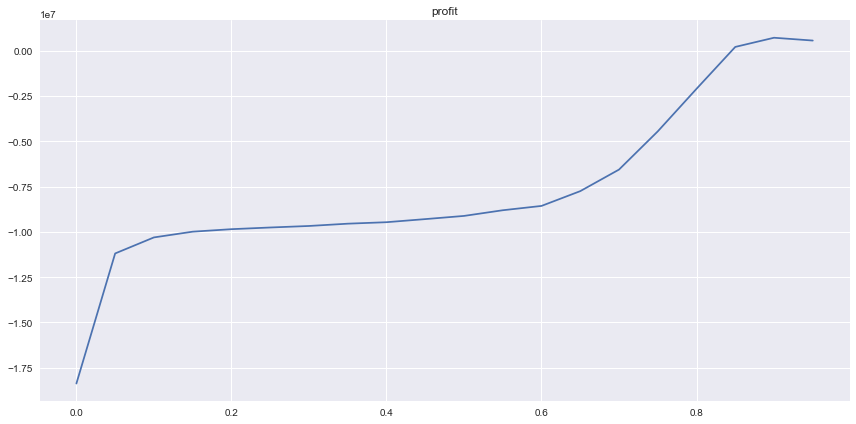

In [309]:
plt.style.use("seaborn")

plt.figure(figsize=(12,6))
plt.plot(array,results)
plt.title("profit")
plt.tight_layout()
plt.show()